In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/content/gardasil - data.xls')

In [3]:
df.head()

,Patient,Age,Race,Shots,Completed,InsuranceType,MedAssist,Location,PracticeType
0,1,21,0,3,1.0,3,0,1,1
1,2,21,0,3,1.0,3,0,1,1
2,3,20,0,1,0.0,1,0,1,1
3,4,14,0,3,1.0,3,0,1,0
4,5,17,3,2,0.0,3,0,1,1


In [4]:
#Age = the patient's age in years 

#Race = the patient's race (0 = white, 1 = black, 2 = Hispanic, 3 = other/unknown)

#Shots = the number of shots that the patients completed during a period of 12 months from
#the time of the first shot

#Completed = did the patient complete the three-shot regimen within the recommended period
#of 12 months (0 = no, 1 = yes)

#InsuranceType = the type of insurance that the patient had (0 = medical assistance, 1 = 
#private payer [Blue Cross Blue Shield, Aetna, Cigna, United, Commercial, CareFirst], 2 = 
#hospital based [EHF], 3 = military [USFHP, Tricare, MA])

#MedAssist = did the patient have some type of medical assistance (0 = no, 1 = yes)

#Location = the clinic that the patient attended (1 = Odenton, 2 = White Marsh, 3 = 
#Johns Hopkins Outpatient Center, 4 = Bayview)

#PracticeType = the type of practice that the patient visited (0 = pediatric, 1 = family
#practice, 2 = OB-GYN


In [5]:
#sns.pairplot(df)

In [6]:
pivot_Shots_Race=pd.pivot_table(df,values='Completed',index='Race',columns='Shots',aggfunc=len)
print(pivot_Shots_Race)

Shots    1    2    3
Race                
0      201  214  317
1      167  146  130
2       14   20   18
3       58   56   72


In [7]:
df.groupby('Race').mean()[['Age','Shots','Completed']]

,Age,Shots,Completed
Race,,,
0,18.935792,2.158470,0.383037
1,18.045147,1.916479,0.237020
2,17.480769,2.076923,0.326923
3,18.510753,2.075269,0.362162


In [8]:
df.groupby('Location').mean()[['Age','Shots','Completed']]

,Age,Shots,Completed
Location,,,
1,18.813283,2.100251,0.345044
2,20.818182,2.309091,0.484848
3,21.921348,1.741573,0.213483
4,16.088643,1.969529,0.263889


In [9]:
df.groupby('PracticeType').mean()[['Age','Shots','Completed']]

,Age,Shots,Completed
PracticeType,,,
0,14.920388,2.087379,0.314563
1,19.460274,2.008219,0.291209
2,21.425891,2.091932,0.377820


In [10]:
df[df['PracticeType']==0]

,Patient,Age,Race,Shots,Completed,InsuranceType,MedAssist,Location,PracticeType
3,4,14,0,3,1.0,3,0,1,0
5,6,11,1,1,0.0,0,1,1,0
7,8,15,3,3,1.0,1,0,1,0
8,9,13,3,3,1.0,1,0,1,0
10,11,17,1,2,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1257,1258,16,0,3,1.0,1,0,4,0
1258,1259,12,0,2,0.0,0,1,4,0
1259,1260,13,0,2,0.0,0,1,4,0
1260,1261,14,1,1,0.0,0,1,4,0


<ipython-input-11-fc3ae4c17b6b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shots'])


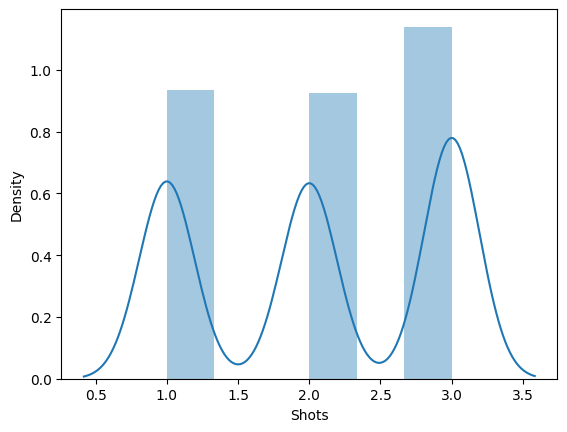

In [11]:
sns.distplot(df['Shots'])
plt.savefig('Distribution of Shots.png')

In [12]:
df.head()

,Patient,Age,Race,Shots,Completed,InsuranceType,MedAssist,Location,PracticeType
0,1,21,0,3,1.0,3,0,1,1
1,2,21,0,3,1.0,3,0,1,1
2,3,20,0,1,0.0,1,0,1,1
3,4,14,0,3,1.0,3,0,1,0
4,5,17,3,2,0.0,3,0,1,1


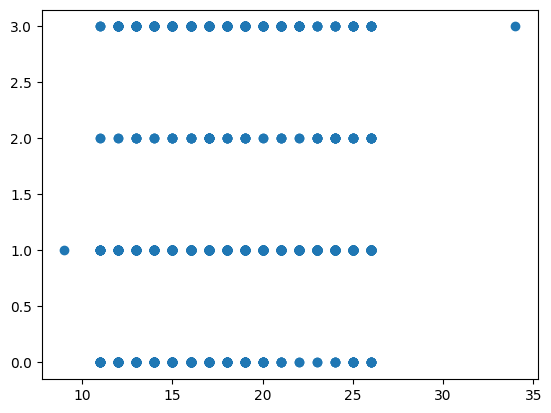

In [13]:
plt.scatter(df['Age'],df['InsuranceType'])

In [14]:
df.groupby('InsuranceType').mean()[['Age','Shots','Completed']]

,Age,Shots,Completed
InsuranceType,,,
0,16.192727,1.850909,0.200730
1,19.751037,2.085754,0.349931
2,19.404762,2.250000,0.464286
3,17.655589,2.166163,0.369697


In [15]:
pivot_Ins_Race=pd.pivot_table(df,values='Completed',index='Race',columns='InsuranceType',aggfunc=len)
print(pivot_Ins_Race)

InsuranceType    0    1   2    3
Race                            
0               92  400  48  192
1              147  214  26   56
2               21   22   2    7
3               15   87   8   76


In [16]:
pivot_Med_Prac=pd.pivot_table(df,values='Completed',index='MedAssist',columns='PracticeType',aggfunc=len)
print(pivot_Med_Prac)

PracticeType    0    1    2
MedAssist                  
0             311  353  474
1             204   12   59


In [17]:
df['Race'].replace(0,'White',inplace=True)
df['Race'].replace(1,'Black',inplace=True)
df['Race'].replace(2,'Hispanic',inplace=True)
df['Race'].replace(3,'Other/Unknown',inplace=True)

In [18]:
df['Race'].value_counts()

White            732
Black            443
Other/Unknown    186
Hispanic          52
Name: Race, dtype: int64

In [19]:
df['InsuranceType'].replace(0,'Medical Assistance',inplace=True)
df['InsuranceType'].replace(1,'Private Payer',inplace=True)
df['InsuranceType'].replace(2,'Hospital Based',inplace=True)
df['InsuranceType'].replace(3,'Military',inplace=True)

In [20]:
df['InsuranceType'].value_counts()

Private Payer         723
Military              331
Medical Assistance    275
Hospital Based         84
Name: InsuranceType, dtype: int64

In [21]:
df.head()

,Patient,Age,Race,Shots,Completed,InsuranceType,MedAssist,Location,PracticeType
0,1,21,White,3,1.0,Military,0,1,1
1,2,21,White,3,1.0,Military,0,1,1
2,3,20,White,1,0.0,Private Payer,0,1,1
3,4,14,White,3,1.0,Military,0,1,0
4,5,17,Other/Unknown,2,0.0,Military,0,1,1


In [22]:
df['MedAssist'] = df['MedAssist'].replace({0: 'No', 1: 'Yes'})

In [23]:
df['Completed'] = df['Completed'].replace({0: 'No', 1: 'Yes'})
df['Location'] = df['Location'].replace({1: 'Odenton', 2: 'White Marsh', 3: 'Johns Hopkins Outpatient Center', 4:'Bayview'})

In [24]:
df['Completed'].value_counts()

No     942
Yes    469
Name: Completed, dtype: int64

In [25]:
df['PracticeType'] = df['PracticeType'].replace({0: 'Pediatric', 1: 'Family Practice', 2: 'OB-GYN'})

In [26]:
df.head()

,Patient,Age,Race,Shots,Completed,InsuranceType,MedAssist,Location,PracticeType
0,1,21,White,3,Yes,Military,No,Odenton,Family Practice
1,2,21,White,3,Yes,Military,No,Odenton,Family Practice
2,3,20,White,1,No,Private Payer,No,Odenton,Family Practice
3,4,14,White,3,Yes,Military,No,Odenton,Pediatric
4,5,17,Other/Unknown,2,No,Military,No,Odenton,Family Practice


In [27]:
pivot_Race_Loc=pd.pivot_table(df,values='Completed',index='Race',columns='Location',aggfunc=len)

In [28]:
print(pivot_Race_Loc)

Location       Bayview  Johns Hopkins Outpatient Center  Odenton  White Marsh
Race                                                                         
Black              141                               57      220           25
Hispanic            28                                3       15            6
Other/Unknown       20                                3      161            2
White              172                               26      402          132


In [29]:
df[df['Race']=='Black']['Completed'].value_counts()

No     338
Yes    105
Name: Completed, dtype: int64

In [30]:
df[df['Race']=='White']['Completed'].value_counts()

No     451
Yes    280
Name: Completed, dtype: int64

In [31]:
pd.crosstab(df['Completed'],df['Race'])

Race,Black,Hispanic,Other/Unknown,White
Completed,,,,
No,338,35,118,451
Yes,105,17,67,280


In [32]:
odds_black=(105/338)
odds_white=(280/451)
print('Odds of Completion for Black Women:', odds_black)
print('Odds of Completion for White Women:', odds_white)

Odds of Completion for Black Women: 0.3106508875739645
Odds of Completion for White Women: 0.6208425720620843


In [33]:
odds_ratio_race = (338*280)/(105*451)
print('Odds Ratio of White vs Black Woman:', odds_ratio_race)

Odds Ratio of White vs Black Woman: 1.9985218033998522


In [34]:
for i, location in enumerate(df['Location']):
    if location == 'Johns Hopkins Outpatient Center':
        df.loc[i, 'Location 2'] = 'Urban'
    else:
        df.loc[i, 'Location 2'] = 'Suburban'


In [35]:
df.head()

,Patient,Age,Race,Shots,Completed,InsuranceType,MedAssist,Location,PracticeType,Location 2
0,1,21,White,3,Yes,Military,No,Odenton,Family Practice,Suburban
1,2,21,White,3,Yes,Military,No,Odenton,Family Practice,Suburban
2,3,20,White,1,No,Private Payer,No,Odenton,Family Practice,Suburban
3,4,14,White,3,Yes,Military,No,Odenton,Pediatric,Suburban
4,5,17,Other/Unknown,2,No,Military,No,Odenton,Family Practice,Suburban


In [36]:
pd.crosstab(df['Completed'],df['Location 2'])

Location 2,Suburban,Urban
Completed,,
No,872,70
Yes,450,19


In [37]:
odds_urban=(19/70)
odds_suburban=(450/872)
print('Odds of Completion for Urban:', odds_urban)
print('Odds of Completion for Suburban:', odds_suburban)

Odds of Completion for Urban: 0.2714285714285714
Odds of Completion for Suburban: 0.5160550458715596


In [38]:
odds_ratio_location = (19*872)/(70*450)
print('Odds Ratio of Urban vs Suburban:', odds_ratio_location)

Odds Ratio of Urban vs Suburban: 0.525968253968254


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
df_logit=pd.read_excel('/content/gardasil - data.xls')
df_logit.dropna(inplace=True)

In [41]:
model=LogisticRegression()
model.fit(df_logit[['Age']], df_logit['Completed'])
odds_ratio = np.exp(model.coef_)

In [42]:
print("Odds Ratio:",odds_ratio)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Odds Ratio: [[0.97905608]]
Coefficients: [[-0.02116635]]
Intercept: [-0.30624474]


In [43]:
lower_CI = np.exp(model.coef_ - 1.96 * np.std(model.coef_))
upper_CI = np.exp(model.coef_ + 1.96 * np.std(model.coef_))

In [44]:
print("95% Lower CI:", lower_CI)
print("95% Upper CI:", upper_CI)


95% Lower CI: [[0.97905608]]
95% Upper CI: [[0.97905608]]


In [45]:
from scipy.stats import chi2_contingency

In [46]:
completed_insurance = pd.crosstab(df['Completed'], df['InsuranceType'])
chi2, p, dof, expected = chi2_contingency(completed_insurance)

print("Chi-square value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)

Chi-square value: 31.061183980829227
P-value: 8.252023673593929e-07
Degrees of freedom: 3


In [47]:
for i in df_logit['Shots']:
    if i>=2:
        df_logit.loc[df_logit['Shots']==i, 'Completed 2']='Completed'
    else:
        df_logit.loc[df_logit['Shots']==i, 'Completed 2']='Incomplete'


In [48]:
df_logit.columns

Index(['Patient', 'Age', 'Race', 'Shots', 'Completed', 'InsuranceType',
       'MedAssist', 'Location', 'PracticeType', 'Completed 2'],
      dtype='object')

In [49]:
model2=LogisticRegression()
model2.fit(df_logit[['Shots']], df_logit['Completed'])
odds_ratio = np.exp(model2.coef_)

In [50]:
print("Odds Ratio:",odds_ratio)
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)

Odds Ratio: [[442.93878584]]
Coefficients: [[6.09343158]]
Intercept: [-16.44787792]


In [51]:
lower_CI2 = np.exp(model2.coef_ - 1.96 * np.std(model2.coef_))
upper_CI2 = np.exp(model2.coef_ + 1.96 * np.std(model2.coef_))

print("95% Lower CI:", lower_CI2)
print("95% Upper CI:", upper_CI2)

95% Lower CI: [[442.93878584]]
95% Upper CI: [[442.93878584]]


In [52]:
model3=LogisticRegression()
model3.fit(df_logit[['Shots']], df_logit['Completed 2'])
odds_ratio = np.exp(model3.coef_)

In [53]:
print("Odds Ratio:",odds_ratio)
print("Coefficients:", model3.coef_)
print("Intercept:", model3.intercept_)

Odds Ratio: [[0.00034485]]
Coefficients: [[-7.97238886]]
Intercept: [11.96069351]
